<a href="https://colab.research.google.com/github/tejas-kalal/NeuralStack/blob/main/malware_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter

# Step 1: Load the dataset
data = pd.read_csv('TUANDROMD.csv')
data['Label'] = data['Label'].replace({'malware': 1, 'goodware': 0})

<ipython-input-1-1867205f96f1>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace({'malware': 1, 'goodware': 0})


<ipython-input-2-c59c860d0cf6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=data, palette='viridis')


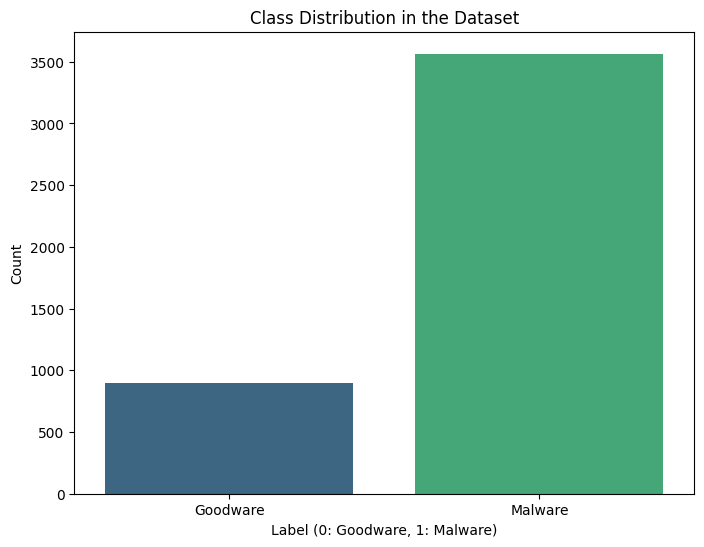

Class distribution: Counter({1.0: 3565, 0.0: 899, nan: 1})


In [ ]:
# Step 2: Visualize the class distribution to check balance
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=data, palette='viridis')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Label (0: Goodware, 1: Malware)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Goodware', 'Malware'])  # Label the x-axis for better understanding
plt.show()

# Optionally, print the counts for each class
class_counts = Counter(data['Label'])
print(f'Class distribution: {class_counts}')

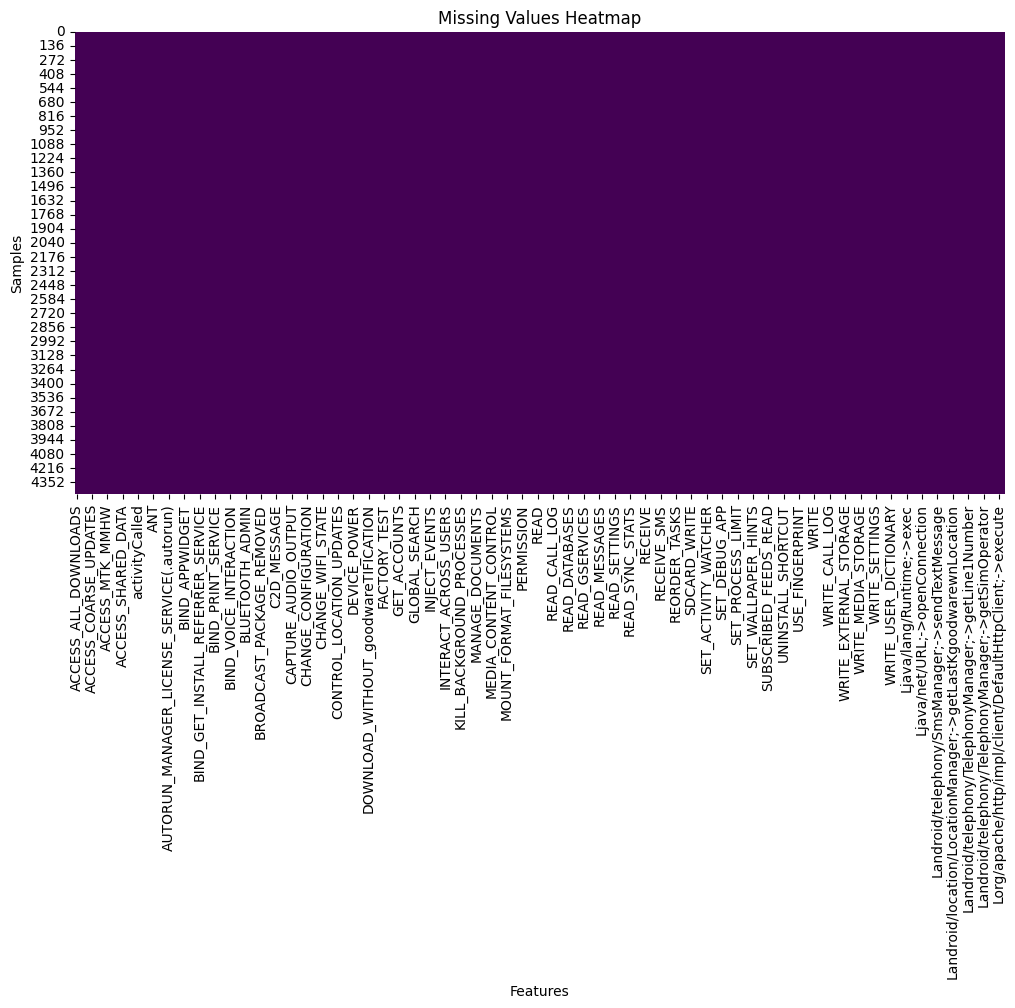

In [ ]:
# Step 3: Check for null values
null_counts = data.isnull().sum()

# Heatmap to visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

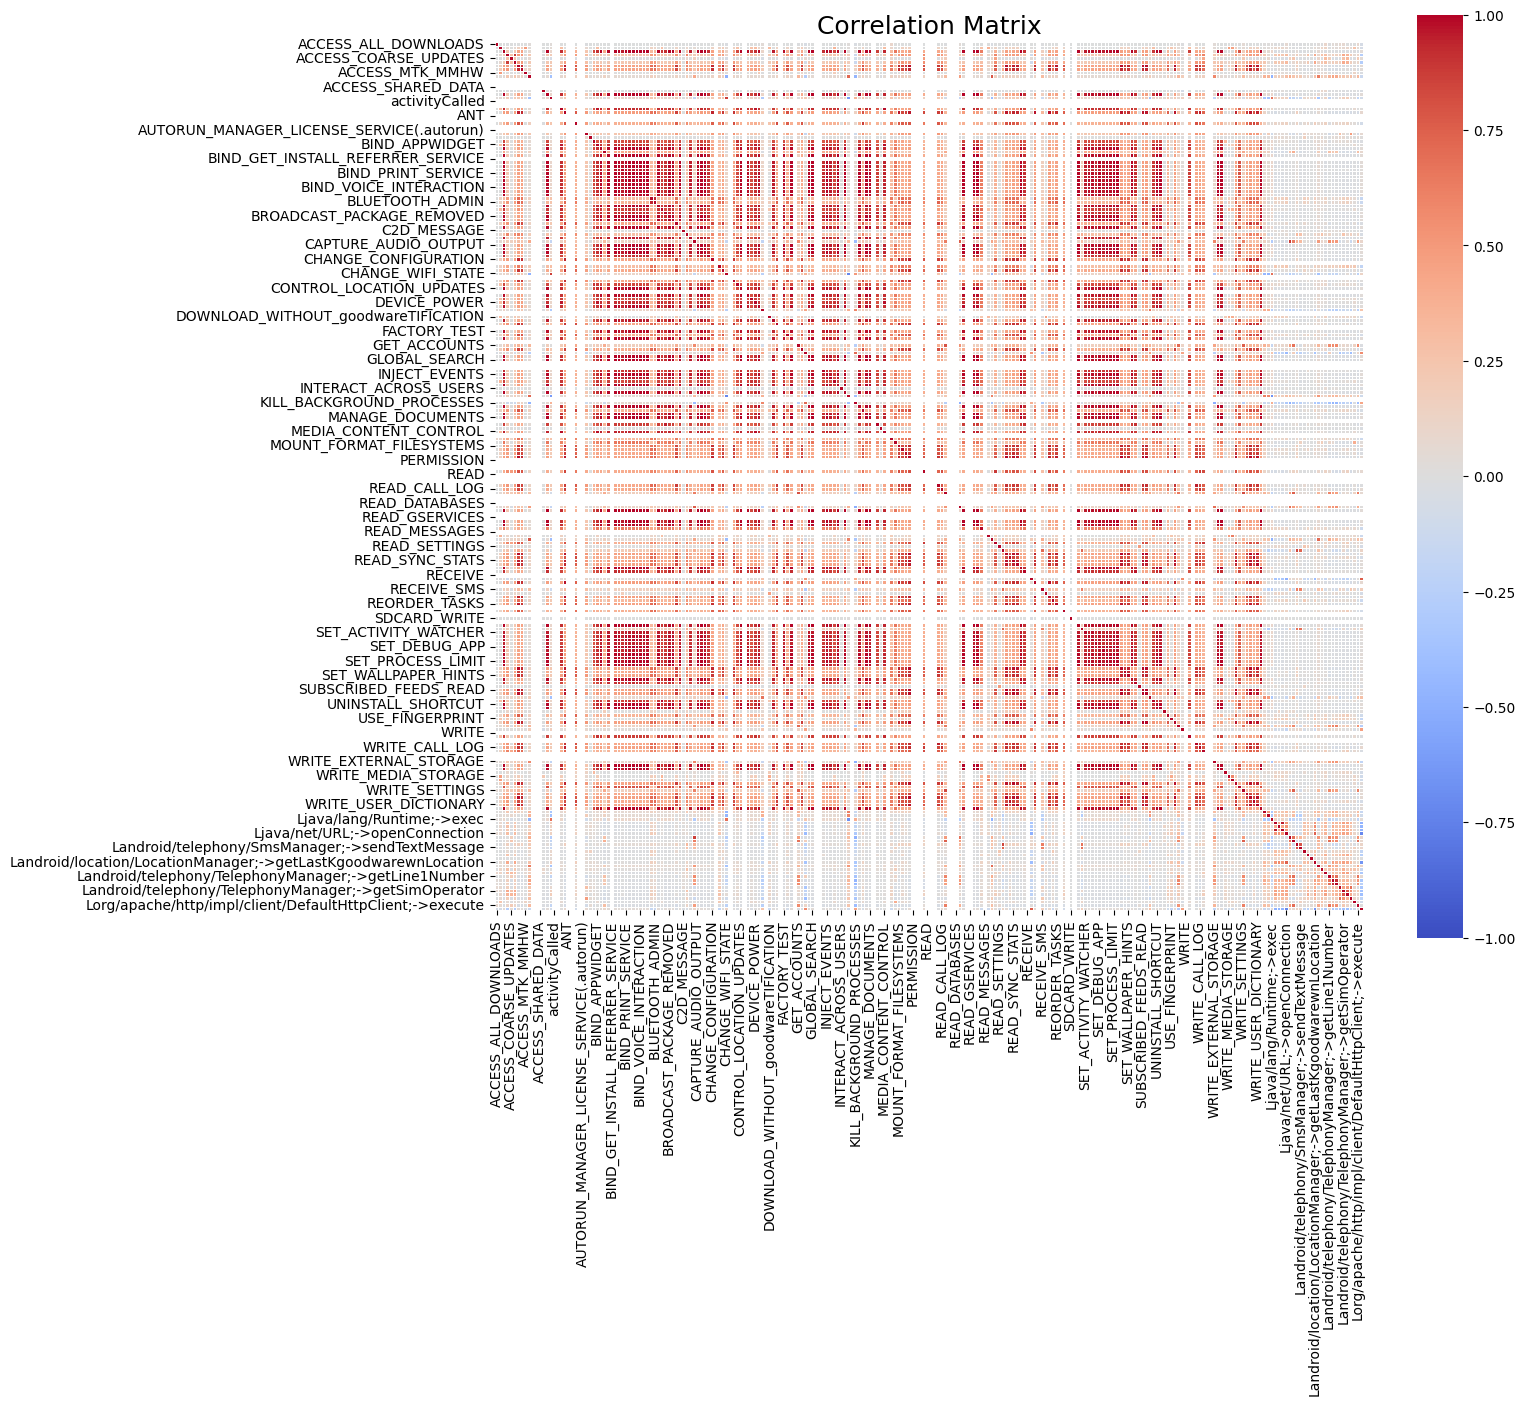

In [ ]:
# Step 4: correlation mattrix
#Increase the figure size for better readability
plt.figure(figsize=(16, 14))

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap without annotations for a cleaner look
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, cbar=True, linewidths=0.5,
            vmin=-1, vmax=1)

# Set the title and other visual improvements
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Step 1: Separate features and target from the original DataFrame
X = data.drop('Label', axis=1)
y = data['Label']

# Step 2: Handle missing values by filling with a specified value or dropping rows
# Option 1: Fill missing values with a specific value (e.g., 0 or the mean)
X = X.fillna(0)  # Alternatively, you could use X = X.fillna(X.mean())

# Option 2: Drop rows with missing values
# X = X.dropna()

# Step 3: Encode the target variable if it is categorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 4: Convert features to a NumPy array
X_array = X.values

# Step 5: Apply the Chi-Squared test
chi2_scores, p_values = chi2(X_array, y_encoded)

# Step 6: Create a DataFrame for visualization of Chi-Squared test results
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Squared Score': chi2_scores,
    'p-value': p_values
})

# Step 7: Sort the results by Chi-Squared Score
chi2_results = chi2_results.sort_values(by='Chi-Squared Score', ascending=False)

# Step 8: Display the sorted Chi-Squared test results
print(chi2_results)


                                               Feature  Chi-Squared Score  \
220                     Ljava/net/URL;->openConnection        1858.124438   
228  Landroid/location/LocationManager;->getLastKgo...        1675.220407   
217                           Ljava/lang/System;->load         936.680425   
219                    Ljava/lang/System;->loadLibrary         886.209812   
218          Ldalvik/system/DexClassLoader;->loadClass         877.251528   
..                                                 ...                ...   
161                                               SEND                NaN   
192                                              WRITE                NaN   
194                                    WRITE_AVSETTING                NaN   
198                                         WRITE_DATA                NaN   
199                                    WRITE_DATABASES                NaN   

           p-value  
220   0.000000e+00  
228   0.000000e+00  
217  4.00341

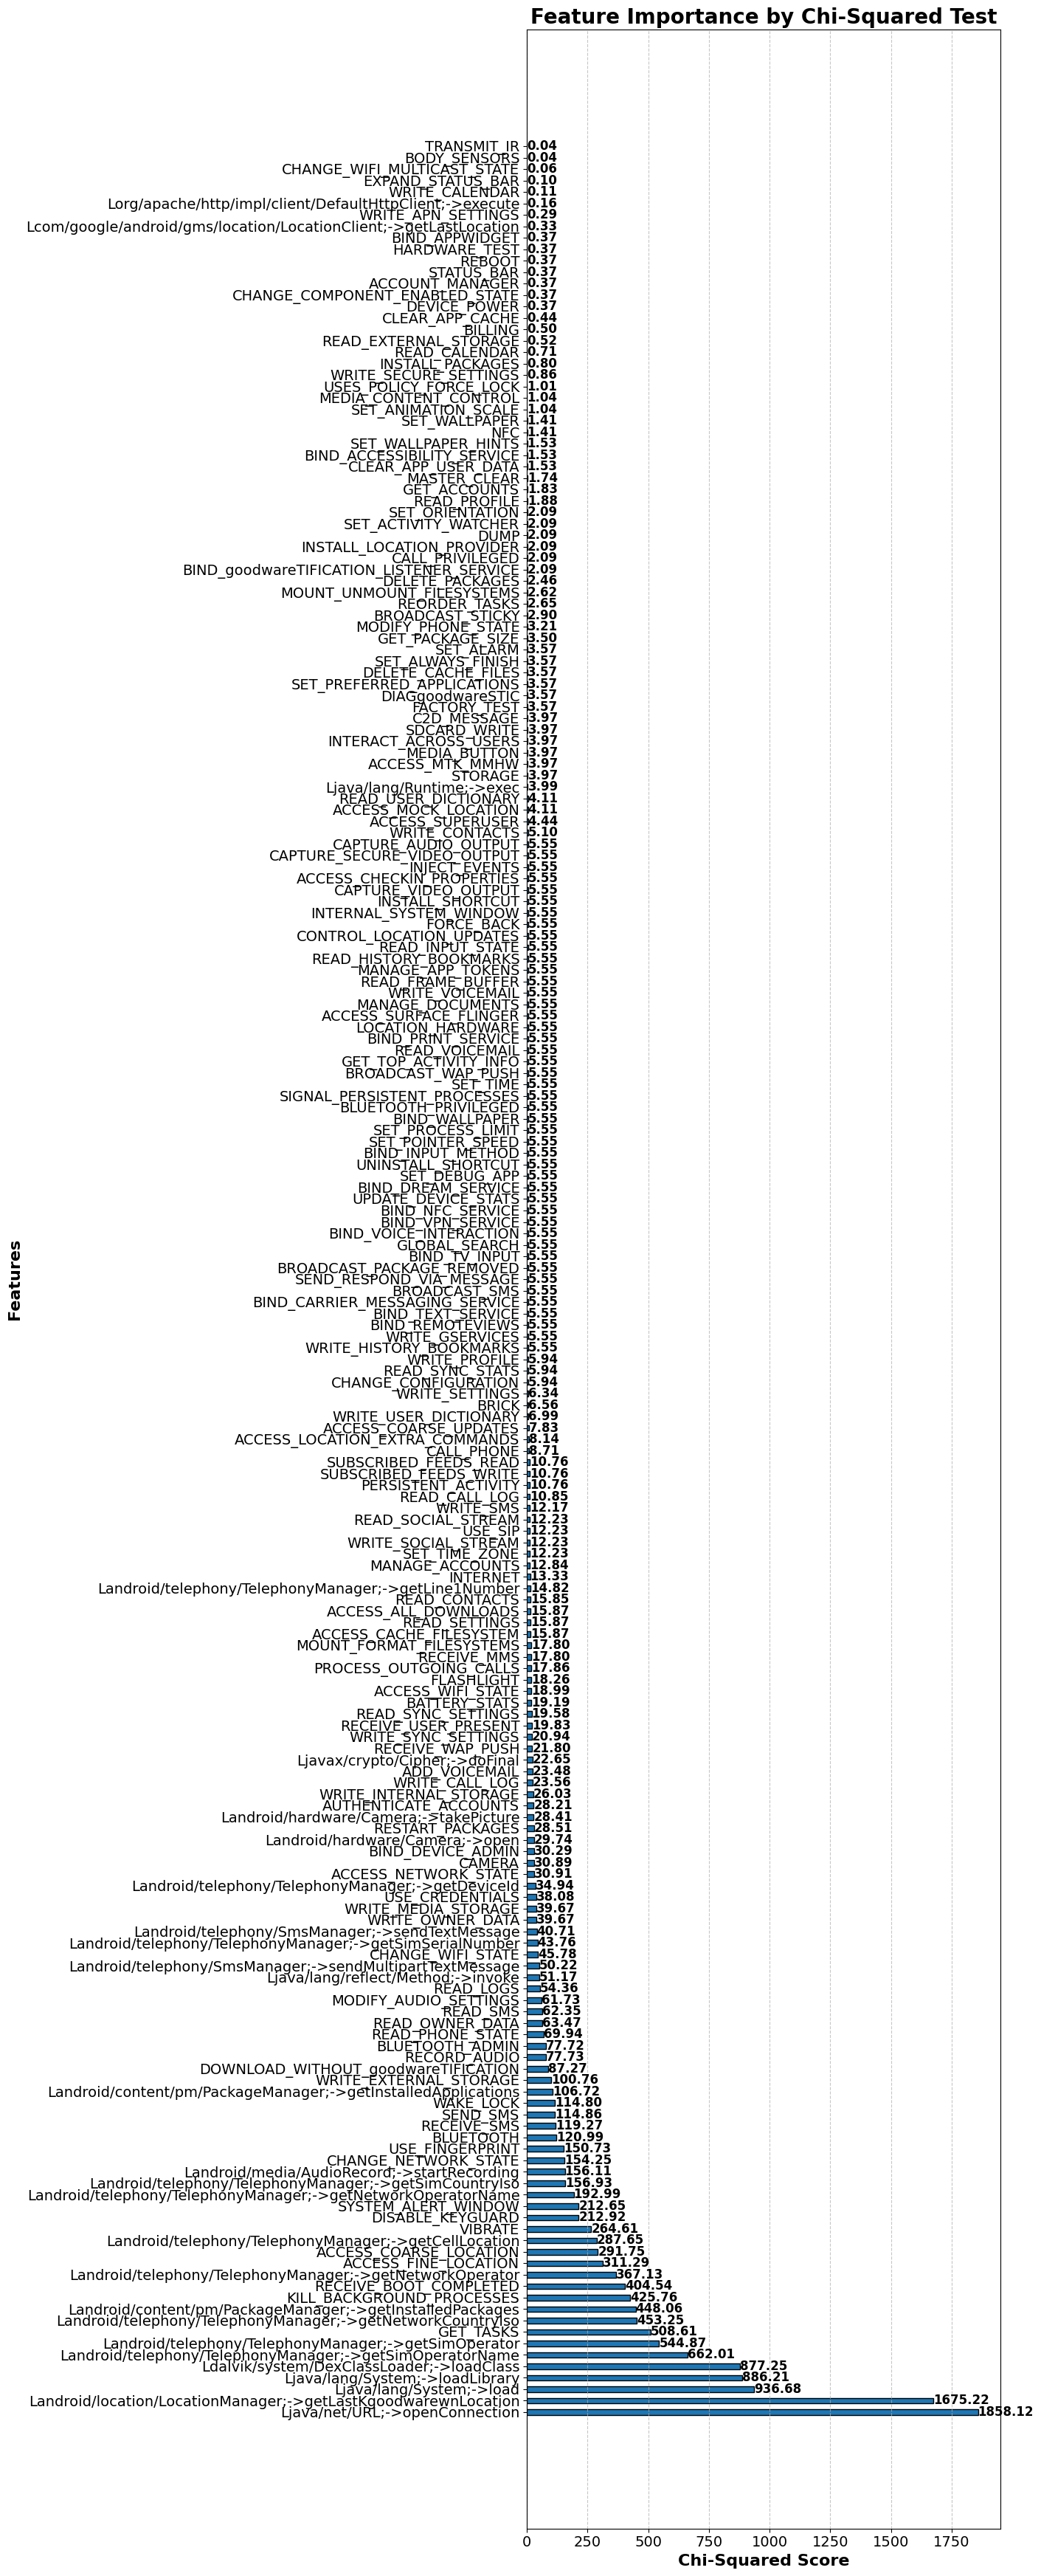

In [ ]:
# Assuming chi2_results DataFrame is already defined with 'Feature' and 'Chi-Squared Score'

# Filter out non-finite values
chi2_results = chi2_results[np.isfinite(chi2_results['Chi-Squared Score'])]

# Improved Plotting of the Chi-Squared Scores
plt.figure(figsize=(14, 35))  # Larger figure size for better visibility

# Create horizontal bar chart
bars = plt.barh(chi2_results['Feature'], chi2_results['Chi-Squared Score'], color='#1f77b4', edgecolor='black', height=0.5)

# Adding labels and title with enhanced font sizes
plt.xlabel('Chi-Squared Score', fontsize=16, fontweight='bold')
plt.ylabel('Features', fontsize=16, fontweight='bold')
plt.title('Feature Importance by Chi-Squared Test', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adding gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding data labels to the bars with better positioning
for bar in bars:
    width = bar.get_width()
    if np.isfinite(width):  # Check if the width is a finite number
        # Offset the label position slightly
        plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
                 f'{width:.2f}', va='center', fontsize=12, color='black', fontweight='bold')

# Adjust layout to make room for the labels and prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define the number of top features to select
top_n_features = 80  # Change this value as needed

# Get the top features
top_features = chi2_results['Feature'].head(top_n_features).values

# Create a new dataset using top features
new_data = data[top_features.tolist() + [data.columns[-1]]]  # Include the target variable
display(new_data.head())

# Count the number of columns
number_of_columns = new_data.shape[1]

# Print the number of columns
print(f'The number of columns in the newdata DataFrame is: {number_of_columns}')

#new_data.to_csv('featureselected_dataset.csv', index=False)

,Ljava/net/URL;->openConnection,Landroid/location/LocationManager;->getLastKgoodwarewnLocation,Ljava/lang/System;->load,Ljava/lang/System;->loadLibrary,Ldalvik/system/DexClassLoader;->loadClass,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimOperator,GET_TASKS,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/content/pm/PackageManager;->getInstalledPackages,...,READ_CONTACTS,Landroid/telephony/TelephonyManager;->getLine1Number,INTERNET,MANAGE_ACCOUNTS,SET_TIME_ZONE,WRITE_SOCIAL_STREAM,USE_SIP,READ_SOCIAL_STREAM,WRITE_SMS,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The number of columns in the newdata DataFrame is: 81


In [ ]:
num_instances = new_data.shape[0]
print(f'Number of instances in the DataFrame: {num_instances}')

Number of instances in the DataFrame: 4465


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

<ipython-input-10-3b26a273b8c3>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_balanced_data['Label'], palette='viridis')


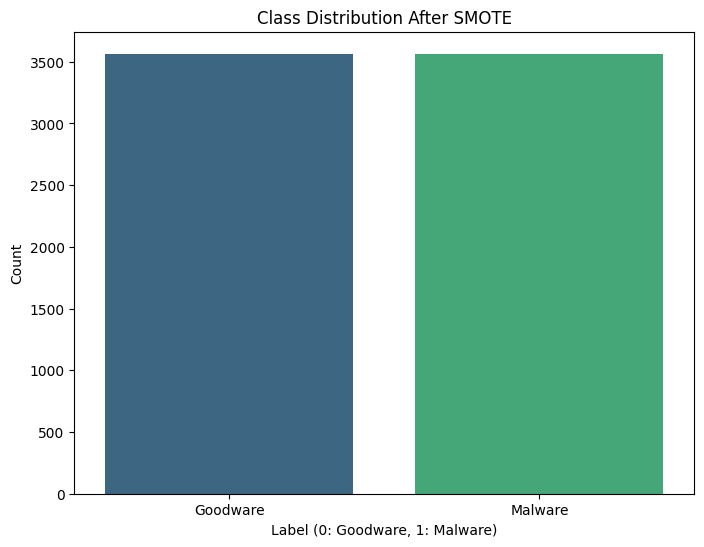

In [ ]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Step 1: Separate features and target
X_tobalance = new_data.drop('Label', axis=1)
y_tobalance = new_data['Label']

# Step 2: Handle missing values in the target variable
# Drop rows where 'Label' is NaN
X_tobalance = X_tobalance[y_tobalance.notna()]
y_tobalance = y_tobalance.dropna()

# Step 3: Handle missing values in features (optional, if any)
# You can fill missing values with a specific value or drop rows with missing values
X_tobalance = X_tobalance.fillna(0)  # Alternatively, use X_tobalance.fillna(X_tobalance.mean())

# Step 4: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_tobalance, y_tobalance)

# Step 5: Create a new DataFrame from the balanced data
new_balanced_data = pd.DataFrame(X_balanced, columns=X_tobalance.columns)
new_balanced_data['Label'] = y_balanced

# Step 6: Visualize the balanced dataset
plt.figure(figsize=(8, 6))
sns.countplot(x=new_balanced_data['Label'], palette='viridis')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Label (0: Goodware, 1: Malware)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Goodware', 'Malware'])
plt.show()


In [ ]:
display(new_balanced_data.head())

,Ljava/net/URL;->openConnection,Landroid/location/LocationManager;->getLastKgoodwarewnLocation,Ljava/lang/System;->load,Ljava/lang/System;->loadLibrary,Ldalvik/system/DexClassLoader;->loadClass,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimOperator,GET_TASKS,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/content/pm/PackageManager;->getInstalledPackages,...,READ_CONTACTS,Landroid/telephony/TelephonyManager;->getLine1Number,INTERNET,MANAGE_ACCOUNTS,SET_TIME_ZONE,WRITE_SOCIAL_STREAM,USE_SIP,READ_SOCIAL_STREAM,WRITE_SMS,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
num_instances = new_balanced_data.shape[0]
print(f'Number of instances in the DataFrame: {num_instances}')

Number of instances in the DataFrame: 7130


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

# Assuming 'new_balanced_data' is your DataFrame
# Step 1: Check for missing values in the target variable
if new_balanced_data['Label'].isnull().any():
    # Drop rows with NaN in the target variable
    new_balanced_data = new_balanced_data.dropna(subset=['Label'])

# Step 2: Separate features and target
X_toclassify = new_balanced_data.drop(columns=['Label'])  # Features
y_toclassify = new_balanced_data['Label']                  # Target variable

# Initialize Stratified K-Fold Cross Validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f2_scores = []

# Train AdaBoost Classifier
for train_index, test_index in skf.split(X_toclassify, y_toclassify):
    X_train, X_test = X_toclassify.iloc[train_index], X_toclassify.iloc[test_index]
    y_train, y_test = y_toclassify.iloc[train_index], y_toclassify.iloc[test_index]

    # Initialize the AdaBoost classifier (using default decision tree as base estimator)
    model = AdaBoostClassifier(n_estimators=50, random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f2_scores.append(fbeta_score(y_test, y_pred, beta=2))  # F2 score

# Calculate average metrics across folds
average_accuracy = sum(accuracies) / len(accuracies)
average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f2 = sum(f2_scores) / len(f2_scores)

# Print the results
print(f'Average Accuracy: {average_accuracy:.4f}')
print(f'Average Precision: {average_precision:.4f}')
print(f'Average Recall: {average_recall:.4f}')
print(f'Average F2 Score: {average_f2:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Average Accuracy: 0.9870
Average Precision: 0.9890
Average Recall: 0.9849
Average F2 Score: 0.9857


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score
from catboost import CatBoostClassifier

# Initialize lists to store metrics for CatBoost
cat_accuracies = []
cat_precisions = []
cat_recalls = []
cat_f2_scores = []


# Train CatBoost Classifier
for train_index, test_index in skf.split(X_toclassify, y_toclassify):
    X_train, X_test = X_toclassify.iloc[train_index], X_toclassify.iloc[test_index]
    y_train, y_test = y_toclassify.iloc[train_index], y_toclassify.iloc[test_index]

    # Initialize the CatBoost classifier
    cat_model = CatBoostClassifier(iterations=50, learning_rate=0.1, depth=6, silent=True)

    # Fit the model
    cat_model.fit(X_train, y_train)

    # Predict on the test set
    cat_y_pred = cat_model.predict(X_test)

    # Calculate metrics
    cat_accuracies.append(accuracy_score(y_test, cat_y_pred))
    cat_precisions.append(precision_score(y_test, cat_y_pred))
    cat_recalls.append(recall_score(y_test, cat_y_pred))
    cat_f2_scores.append(fbeta_score(y_test, cat_y_pred, beta=2))  # F2 score

# Calculate average metrics across folds for CatBoost
average_cat_accuracy = sum(cat_accuracies) / len(cat_accuracies)
average_cat_precision = sum(cat_precisions) / len(cat_precisions)
average_cat_recall = sum(cat_recalls) / len(cat_recalls)
average_cat_f2 = sum(cat_f2_scores) / len(cat_f2_scores)

# Print the results for CatBoost
print(f'Average CatBoost Accuracy: {average_cat_accuracy:.4f}')
print(f'Average CatBoost Precision: {average_cat_precision:.4f}')
print(f'Average CatBoost Recall: {average_cat_recall:.4f}')
print(f'Average CatBoost F1 Score: {average_cat_f2:.4f}')

Average CatBoost Accuracy: 0.9921
Average CatBoost Precision: 0.9961
Average CatBoost Recall: 0.9882
Average CatBoost F1 Score: 0.9898


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize lists to store metrics for Gradient Boosting
gb_accuracies = []
gb_precisions = []
gb_recalls = []
gb_f2_scores = []

# Train Gradient Boosting Classifier
for train_index, test_index in skf.split(X_toclassify, y_toclassify):
    X_train, X_test = X_toclassify.iloc[train_index], X_toclassify.iloc[test_index]
    y_train, y_test = y_toclassify.iloc[train_index], y_toclassify.iloc[test_index]

    # Initialize the Gradient Boosting classifier
    gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

    # Fit the model
    gb_model.fit(X_train, y_train)

    # Predict on the test set
    gb_y_pred = gb_model.predict(X_test)

    # Calculate metrics
    gb_accuracies.append(accuracy_score(y_test, gb_y_pred))
    gb_precisions.append(precision_score(y_test, gb_y_pred))
    gb_recalls.append(recall_score(y_test, gb_y_pred))
    gb_f2_scores.append(fbeta_score(y_test, gb_y_pred, beta=2))  # F2 score

# Calculate average metrics across folds for Gradient Boosting
average_gb_accuracy = sum(gb_accuracies) / len(gb_accuracies)
average_gb_precision = sum(gb_precisions) / len(gb_precisions)
average_gb_recall = sum(gb_recalls) / len(gb_recalls)
average_gb_f2 = sum(gb_f2_scores) / len(gb_f2_scores)

# Print the results for Gradient Boosting
print(f'Average Gradient Boosting Accuracy: {average_gb_accuracy:.4f}')
print(f'Average Gradient Boosting Precision: {average_gb_precision:.4f}')
print(f'Average Gradient Boosting Recall: {average_gb_recall:.4f}')
print(f'Average Gradient Boosting F2 Score: {average_gb_f2:.4f}')


Average Gradient Boosting Accuracy: 0.9867
Average Gradient Boosting Precision: 0.9893
Average Gradient Boosting Recall: 0.9840
Average Gradient Boosting F2 Score: 0.9851


In [ ]:
import xgboost as xgb

# Initialize lists to store metrics for XGBoost
xgb_accuracies = []
xgb_precisions = []
xgb_recalls = []
xgb_f2_scores = []

# Train XGBoost Classifier
for train_index, test_index in skf.split(X_toclassify, y_toclassify):
    X_train, X_test = X_toclassify.iloc[train_index], X_toclassify.iloc[test_index]
    y_train, y_test = y_toclassify.iloc[train_index], y_toclassify.iloc[test_index]

    # Initialize the XGBoost classifier
    xgb_model = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

    # Fit the model
    xgb_model.fit(X_train, y_train)

    # Predict on the test set
    xgb_y_pred = xgb_model.predict(X_test)

    # Calculate metrics
    xgb_accuracies.append(accuracy_score(y_test, xgb_y_pred))
    xgb_precisions.append(precision_score(y_test, xgb_y_pred))
    xgb_recalls.append(recall_score(y_test, xgb_y_pred))
    xgb_f2_scores.append(fbeta_score(y_test, xgb_y_pred, beta=2))  # F2 score

# Calculate average metrics across folds for XGBoost
average_xgb_accuracy = sum(xgb_accuracies) / len(xgb_accuracies)
average_xgb_precision = sum(xgb_precisions) / len(xgb_precisions)
average_xgb_recall = sum(xgb_recalls) / len(xgb_recalls)
average_xgb_f2 = sum(xgb_f2_scores) / len(xgb_f2_scores)

# Print the results for XGBoost
print(f'Average XGBoost Accuracy: {average_xgb_accuracy:.4f}')
print(f'Average XGBoost Precision: {average_xgb_precision:.4f}')
print(f'Average XGBoost Recall: {average_xgb_recall:.4f}')
print(f'Average XGBoost F2 Score: {average_xgb_f2:.4f}')


Average XGBoost Accuracy: 0.9856
Average XGBoost Precision: 0.9901
Average XGBoost Recall: 0.9809
Average XGBoost F2 Score: 0.9827


In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import StratifiedKFold

# Initialize lists to store metrics for Neural Network
nn_accuracies = []
nn_precisions = []
nn_recalls = []
nn_f2_scores = []

# Function to create the neural network model
def create_model(activation='relu'):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_toclassify.shape[1],)),  # Input layer
        tf.keras.layers.Dense(100, activation=activation),  # Hidden layer
        tf.keras.layers.Dense(50, activation=activation),  # Hidden layer
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize Stratified K-Fold Cross Validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train Neural Network Classifier
for train_index, test_index in skf.split(X_toclassify, y_toclassify):
    X_train, X_test = X_toclassify.iloc[train_index], X_toclassify.iloc[test_index]
    y_train, y_test = y_toclassify.iloc[train_index], y_toclassify.iloc[test_index]

    # Check if y_train is in the correct shape
    if len(y_train.shape) > 1:
        y_train = y_train.values.flatten()
    if len(y_test.shape) > 1:
        y_test = y_test.values.flatten()

    # Create the model
    nn_model = create_model(activation='relu')

    # Fit the model
    nn_model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0)  # Train for 300 epochs

    # Predict on the test set
    nn_y_pred_probs = nn_model.predict(X_test)
    nn_y_pred = (nn_y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

    # Calculate metrics
    nn_accuracies.append(accuracy_score(y_test, nn_y_pred))
    nn_precisions.append(precision_score(y_test, nn_y_pred))
    nn_recalls.append(recall_score(y_test, nn_y_pred))
    nn_f2_scores.append(fbeta_score(y_test, nn_y_pred, beta=2))  # F2 score

# Calculate average metrics across folds for Neural Network
average_nn_accuracy = sum(nn_accuracies) / len(nn_accuracies)
average_nn_precision = sum(nn_precisions) / len(nn_precisions)
average_nn_recall = sum(nn_recalls) / len(nn_recalls)
average_nn_f2 = sum(nn_f2_scores) / len(nn_f2_scores)

# Print the results for Neural Network
print(f'Average Neural Network Accuracy: {average_nn_accuracy:.4f}')
print(f'Average Neural Network Precision: {average_nn_precision:.4f}')
print(f'Average Neural Network Recall: {average_nn_recall:.4f}')
print(f'Average Neural Network F2 Score: {average_nn_f2:.4f}')


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average Neural Network Accuracy: 0.9942
Average Neural Network Precision: 0.9977
Average Neural Network Recall: 0.9907
Average Neural Network F2 Score: 0.9921


In [ ]:
!pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf


# Initialize lists to store metrics for the stacking model
stacking_accuracies = []
stacking_precisions = []
stacking_recalls = []
stacking_f2_scores = []

# Arrays to hold the predictions from each model in the first layer
level_1_predictions = np.zeros((X_toclassify.shape[0], 3))  # 3 models: AdaBoost, CatBoost, XGBoost

# First layer: Train AdaBoost, CatBoost, and XGBoost
for train_index, test_index in skf.split(X_toclassify, y_toclassify):
    X_train, X_test = X_toclassify.iloc[train_index], X_toclassify.iloc[test_index]
    y_train, y_test = y_toclassify.iloc[train_index], y_toclassify.iloc[test_index]

    # AdaBoost Classifier
    ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
    ada_model.fit(X_train, y_train)
    level_1_predictions[test_index, 0] = ada_model.predict(X_test)

    # CatBoost Classifier
    cat_model = CatBoostClassifier(iterations=50, learning_rate=0.1, depth=3, silent=True, random_state=42)
    cat_model.fit(X_train, y_train)
    level_1_predictions[test_index, 1] = cat_model.predict(X_test)

    # XGBoost Classifier
    xgb_model = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
    xgb_model.fit(X_train, y_train)
    level_1_predictions[test_index, 2] = xgb_model.predict(X_test)

# Second layer: Train Neural Network as a meta-classifier
# Create a DataFrame for the new training data for the meta-classifier
level_1_df = pd.DataFrame(level_1_predictions, columns=['AdaBoost', 'CatBoost', 'XGBoost'])

# Function to create the neural network model
def create_newmodel(activation='relu'):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(3,)),  # Input shape matches the number of features in level_1_df
        tf.keras.layers.Dense(100, activation=activation),  # Hidden layer
        tf.keras.layers.Dense(50, activation=activation),  # Hidden layer
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train Neural Network Classifier
nn_model = create_newmodel(activation='relu')

# Fit the model using the predictions from the first layer
nn_model.fit(level_1_df, y_toclassify, epochs=300, batch_size=32, verbose=0)

# Predict on the training data (or use a separate test set)
level_1_predictions_meta = nn_model.predict(level_1_df)
nn_y_pred = (level_1_predictions_meta > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Calculate metrics for the stacked model
stacking_accuracy = accuracy_score(y_toclassify, nn_y_pred)
stacking_precision = precision_score(y_toclassify, nn_y_pred)
stacking_recall = recall_score(y_toclassify, nn_y_pred)
stacking_f2 = fbeta_score(y_toclassify, nn_y_pred, beta=2)  # F2 score

# Print the results for the stacking model
print(f'Stacking Model Results:')
print(f'Accuracy: {stacking_accuracy:.4f}')
print(f'Precision: {stacking_precision:.4f}')
print(f'Recall: {stacking_recall:.4f}')
print(f'F2 Score: {stacking_f2:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Stacking Model Results:
Accuracy: 0.9889
Precision: 0.9938
Recall: 0.9840
F2 Score: 0.9859


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

# Initialize lists to store metrics for the stacking model
stacking_accuracies = []
stacking_precisions = []
stacking_recalls = []
stacking_f2_scores = []

# Arrays to hold the predictions from each model in the first layer
level_1_predictions = np.zeros((X_toclassify.shape[0], 3))  # 3 models: AdaBoost, CatBoost, XGBoost

# First layer: Train AdaBoost, CatBoost, and XGBoost
for train_index, test_index in skf.split(X_toclassify, y_toclassify):
    X_train, X_test = X_toclassify.iloc[train_index], X_toclassify.iloc[test_index]
    y_train, y_test = y_toclassify.iloc[train_index], y_toclassify.iloc[test_index]

    # AdaBoost Classifier
    ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
    ada_model.fit(X_train, y_train)
    level_1_predictions[test_index, 0] = ada_model.predict(X_test)

    # CatBoost Classifier
    cat_model = CatBoostClassifier(iterations=50, learning_rate=0.1, depth=3, silent=True, random_state=42)
    cat_model.fit(X_train, y_train)
    level_1_predictions[test_index, 1] = cat_model.predict(X_test)

    # XGBoost Classifier
    xgb_model = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
    xgb_model.fit(X_train, y_train)
    level_1_predictions[test_index, 2] = xgb_model.predict(X_test)

# Second layer: Train GradientBoostingClassifier as a meta-classifier
# Create a DataFrame for the new training data for the meta-classifier
level_1_df = pd.DataFrame(level_1_predictions, columns=['AdaBoost', 'CatBoost', 'XGBoost'])

# Gradient Boosting Classifier as the meta-classifier
meta_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
meta_model.fit(level_1_df, y_toclassify)

# Predict on the training data (or use a separate test set)
nn_y_pred = meta_model.predict(level_1_df)

# Calculate metrics for the stacked model
stacking_accuracy = accuracy_score(y_toclassify, nn_y_pred)
stacking_precision = precision_score(y_toclassify, nn_y_pred)
stacking_recall = recall_score(y_toclassify, nn_y_pred)
stacking_f2 = fbeta_score(y_toclassify, nn_y_pred, beta=2)  # F2 score

# Print the results for the stacking model
print(f'Stacking Model Results:')
print(f'Accuracy: {stacking_accuracy:.4f}')
print(f'Precision: {stacking_precision:.4f}')
print(f'Recall: {stacking_recall:.4f}')
print(f'F2 Score: {stacking_f2:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Stacking Model Results:
Accuracy: 0.9889
Precision: 0.9938
Recall: 0.9840
F2 Score: 0.9859
